In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Load Dataset
---

In [3]:
df_major = pd.read_csv('majors_fix.csv')
# df_score_humanities_all = pd.read_csv('score_humanities_all.csv')
# df_score_science_all = pd.read_csv('score_science_all.csv')
df_score_all = pd.read_csv('scores_all.csv')
df_universities = pd.read_csv('universities.csv')

df_major.set_index("id_major", inplace=True)
df_universities.set_index("id_university", inplace=True)

In [4]:
df_major.sample(5)

,id_university,type,major_name,capacity,university_name
id_major,,,,,
3841133,384,science,SISTEM INFORMASI,100,UNIVERSITAS TRUNOJOYO MADURA
7212146,721,humanities,SASTRA JERMAN,14,UNIVERSITAS SAM RATULANGI
1212185,121,humanities,SASTRA JEPANG,36,UNIVERSITAS SUMATERA UTARA
1612015,161,humanities,ILMU HUKUM,225,UNIVERSITAS BENGKULU
3531271,353,science,FARMASI,30,UNIVERSITAS SEBELAS MARET


In [5]:
df_score_all.sample(5)

,Unnamed: 0,id_user,id_major,id_university,avg_score,choice,type
41490,41490,176236,7111053,711,450.750000,1,science
239188,4852,39820,3242025,324,619.444444,2,humanity
10523,10523,52606,3611356,361,653.625000,1,science
72429,72429,289429,3331206,333,485.250000,1,science
76174,76174,302785,3741051,374,560.250000,1,science


In [6]:
#df_score_science_all.sample(5)

In [7]:
df_score_all.sample(5)

,Unnamed: 0,id_user,id_major,id_university,avg_score,choice,type
132949,46380,195978,3531112,353,593.250000,1,science
31983,31983,134361,1711141,171,539.500000,1,science
253851,19515,131565,1712167,171,574.333333,2,humanity
179222,6084,47029,3722096,372,482.888889,1,humanity
27341,27341,117156,3811045,381,542.000000,1,science


### Data Exploration

1. Most Favorite Universities
2. Most Favorite Major
3. Least Favorite Universities
4. Least Favorite Major
5. Passing Grade

### 1. Most Favorite Universities

#### For All Student

In [8]:
df_fav_univs = df_score_all.groupby(by="id_university").count().sort_values(by='choice', ascending=False)[0:10]
df_fav_univs = df_fav_univs.reset_index().merge(df_universities, on="id_university", how="left")

In [9]:
df_fav_univs.columns
columns_to_keep = ['choice', 'university_name']
summary_fav_univs = df_fav_univs[columns_to_keep]
summary_fav_univs

,choice,university_name
0,18830,UNIVERSITAS BRAWIJAYA
1,16188,UNIVERSITAS DIPONEGORO
2,15378,UNIVERSITAS PADJADJARAN
3,13828,UNIVERSITAS GADJAH MADA
4,13779,UNIVERSITAS SEBELAS MARET
5,13703,UNIVERSITAS INDONESIA
6,10430,UNIVERSITAS PENDIDIKAN INDONESIA
7,9148,UNIVERSITAS JENDERAL SOEDIRMAN
8,8609,UNIVERSITAS NEGERI SEMARANG
9,8415,UNIVERSITAS JEMBER


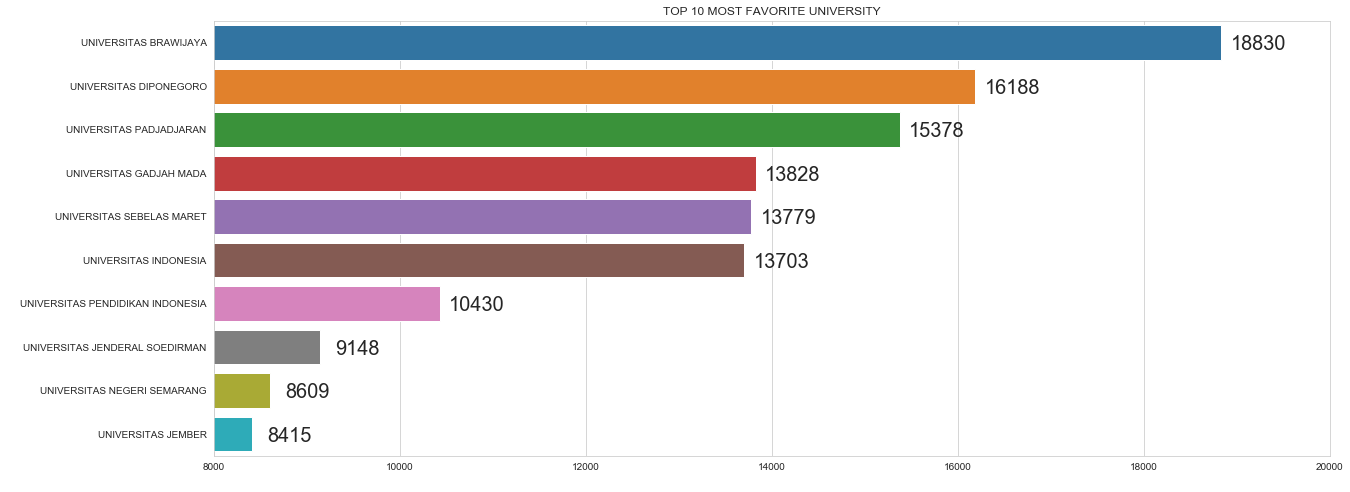

In [10]:
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
graph = sns.barplot(data=summary_fav_univs, x='choice', y='university_name')
plt.xlim(8000,20000)
plt.ylabel('UNIVERSITIES', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('TOP 10 MOST FAVORITE UNIVERSITY')
plt.rcParams['font.size']=20

for p in graph.patches:
    width = p.get_width()
    plt.text(400+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')
            
plt.show()


#### For Humanities Student

In [11]:
df_fav_univs_hums = df_score_all[df_score_all.type == "social"]
df_fav_univs_hums = df_fav_univs_hums.groupby(by="id_university").count().sort_values(by='choice', ascending=False)[0:10]
df_fav_univs_hums = df_fav_univs_hums.reset_index().merge(df_universities, on="id_university", how="left")

In [12]:
df_fav_univs_hums.columns
columns_to_keep = ['choice', 'university_name']
summary_fav_univs_hums = df_fav_univs_hums[columns_to_keep]
summary_fav_univs_hums

,choice,university_name


In [13]:
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
graph = sns.barplot(data=summary_fav_univs_hums, x='choice', y='university_name')
plt.xlim(4500,7000)
plt.ylabel('UNIVERSITIES', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('TOP 10 MOST FAVORITE UNIVERSITY OF HUMANITIES MAJOR')
plt.rcParams['font.size']=20

for p in graph.patches:
    width = p.get_width()
    plt.text(75+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')
        
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1440x576 with 0 Axes>

#### For Sciences Student

In [ ]:
df_fav_univs_sci = df_score_all[df_score_all.type == "science"]
df_fav_univs_sci = df_fav_univs_sci.groupby(by="id_university").count().sort_values(by='choice', ascending=False)[0:10]
df_fav_univs_sci= df_fav_univs_sci.reset_index().merge(df_universities, on="id_university", how="left")

In [ ]:
df_fav_univs_sci.columns
columns_to_keep = ['choice', 'university_name']
summary_fav_univs_sci = df_fav_univs_sci[columns_to_keep]
summary_fav_univs_sci

In [ ]:
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
graph = sns.barplot(data=summary_fav_univs_sci, x='choice', y='university_name')
plt.xlim(5500,12500)
plt.ylabel('UNIVERSITIES', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('TOP 10 MOST FAVORITE UNIVERSITY OF SCIENCES MAJOR')
plt.rcParams['font.size']=20

for p in graph.patches:
    width = p.get_width()
    plt.text(250+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')
        
plt.show()

### 2. Most Favorite Majors

#### For All Students

In [ ]:
df_fav_major = df_score_all.groupby(by="id_major").count().sort_values(by='choice', ascending=False)[0:10]
df_fav_major = df_fav_major.reset_index().merge(df_major, on="id_major", how="left")

In [ ]:
df_fav_major['major_univ'] = df_fav_major['major_name'] + ', ' + df_fav_major['university_name']

In [ ]:
df_fav_major.columns
columns_to_keep = ['major_univ', 'choice']
summary_fav_major = df_fav_major[columns_to_keep]
summary_fav_major

In [ ]:
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
graph = sns.barplot(data=summary_fav_major, x='choice', y='major_univ')
plt.xlim(680,1200)
plt.ylabel('MAJOR', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('TOP 10 MOST FAVORITE MAJOR')
plt.rcParams['font.size']=20

for p in graph.patches:
    width = p.get_width()
    plt.text(15+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')
        
plt.show()

#### For Humanities Student

In [ ]:
df_fav_major_hums = df_score_all[df_score_all.type == "social"]
df_fav_major_hums = df_fav_major_hums.groupby(by="id_major").count().sort_values(by='choice', ascending=False)[0:10]
df_fav_major_hums = df_fav_major_hums.reset_index().merge(df_major, on="id_major", how="left")

In [ ]:
df_fav_major_hums['major_univ'] = df_fav_major_hums['major_name'] + ', ' + df_fav_major_hums['university_name']

In [ ]:
df_fav_major_hums.columns
columns_to_keep = ['major_univ', 'choice']
summary_fav_major_hums = df_fav_major_hums[columns_to_keep]
summary_fav_major_hums

In [ ]:
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
graph = sns.barplot(data=summary_fav_major_hums, x='choice', y='major_univ')
plt.xlim(540,1200)
plt.ylabel('MAJOR', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('TOP 10 MOST FAVORITE HUMANITIES MAJOR')
plt.rcParams['font.size']=20

for p in graph.patches:
    width = p.get_width()
    plt.text(15+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')
        
plt.show()

#### For Science Student

In [ ]:
df_fav_major_sci = df_score_all[df_score_all.type == "science"]
df_fav_major_sci = df_fav_major_sci.groupby(by="id_major").count().sort_values(by='choice', ascending=False)[0:10]
df_fav_major_sci = df_fav_major_sci.reset_index().merge(df_major, on="id_major", how="left")

In [ ]:
df_fav_major_sci['major_univ'] = df_fav_major_sci['major_name'] + ', ' + df_fav_major_sci['university_name']

In [ ]:
df_fav_major_sci.columns
columns_to_keep = ['major_univ', 'choice']
summary_fav_major_sci = df_fav_major_sci[columns_to_keep]
summary_fav_major_sci

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
graph = sns.barplot(data=summary_fav_major_sci, x='choice', y='major_univ')
plt.xlim(620,820)
plt.ylabel('MAJOR', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('TOP 10 MOST FAVORITE SCIENCES MAJOR')
plt.rcParams['font.size']=20

for p in graph.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')
        
plt.show()

### 3. Least Favorite Universities

#### For All Student

In [ ]:
df_lst_univs = df_score_all.groupby(by="id_university").count().sort_values(by='choice', ascending=True)[0:10]
df_lst_univs = df_lst_univs.reset_index().merge(df_universities, on="id_university", how="left")

In [ ]:
df_lst_univs.columns
columns_to_keep = ['choice', 'university_name']
summary_lst_univs = df_lst_univs[columns_to_keep]
summary_lst_univs = summary_lst_univs.sort_values(by='choice', ascending=False)
summary_lst_univs

In [ ]:
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
graph = sns.barplot(data=summary_lst_univs, x='choice', y='university_name')
plt.xlim(0,100)
plt.ylabel('UNIVERSITIES', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('TOP 10 MOST LEAST FAVORITE UNIVERSITY')
plt.rcParams['font.size']=20

for p in graph.patches:
    width = p.get_width()
    plt.text(1.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')
        
plt.show()

#### For Humanities Student

In [ ]:
df_lst_univs_hums = df_score_all[df_score_all.type == "social"]
df_lst_univs_hums = df_lst_univs_hums.groupby(by="id_university").count().sort_values(by='choice', ascending=True)[0:10]
df_lst_univs_hums = df_lst_univs_hums.reset_index().merge(df_universities, on="id_university", how="left")

In [ ]:
df_lst_univs_hums.columns
columns_to_keep = ['choice', 'university_name']
summary_lst_univs_hums = df_lst_univs_hums[columns_to_keep]
summary_lst_univs_hums = summary_lst_univs_hums.sort_values(by='choice', ascending=False)
summary_lst_univs_hums

In [ ]:
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
graph = sns.barplot(data=summary_lst_univs_hums, x='choice', y='university_name')
plt.xlim(0,50)
plt.ylabel('UNIVERSITIES', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('TOP 10 MOST LEAST FAVORITE UNIVERSITY OF HUMANITIES MAJOR')
plt.rcParams['font.size']=20

for p in graph.patches:
    width = p.get_width()
    plt.text(1+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')
        
plt.show()

#### For Science Student

In [ ]:
df_lst_univs_sci = df_score_all[df_score_all.type == "science"]
df_lst_univs_sci = df_lst_univs_sci.groupby(by="id_university").count().sort_values(by='choice', ascending=True)[0:10]
df_lst_univs_sci= df_lst_univs_sci.reset_index().merge(df_universities, on="id_university", how="left")

In [ ]:
df_lst_univs_sci.columns
columns_to_keep = ['choice', 'university_name']
summary_lst_univs_sci = df_lst_univs_sci[columns_to_keep]
summary_lst_univs_sci = summary_lst_univs_sci.sort_values(by='choice', ascending=False)
summary_lst_univs_sci

In [ ]:
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
graph = sns.barplot(data=summary_lst_univs_sci, x='choice', y='university_name')
plt.xlim(0,110)
plt.ylabel('UNIVERSITIES', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('TOP 10 MOST LEAST FAVORITE UNIVERSITY OF SCIENCES MAJOR')
plt.rcParams['font.size']=20

for p in graph.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')
        
plt.show()

### 4. Least Favorite Majors

#### For All Student

In [ ]:
df_lst_major = df_score_all.groupby(by="id_major").sum().sort_values(by='choice', ascending=True)[0:10]
df_lst_major = df_lst_major.reset_index().merge(df_major, on="id_major", how="left")

In [ ]:
df_lst_major['major_univ'] = df_lst_major['major_name'] + ', ' + df_lst_major['university_name']

In [ ]:
df_lst_major.columns
columns_to_keep = ['major_univ', 'choice']
summary_lst_major = df_lst_major[columns_to_keep]
summary_lst_major

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
graph = sns.barplot(data=summary_lst_major, x='choice', y='major_univ')
plt.xlim(0,10)
plt.ylabel('MAJOR', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('TOP 10 MOST LEAST FAVORITE MAJOR')
plt.rcParams['font.size']=20

for p in graph.patches:
    width = p.get_width()
    plt.text(0.25+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')
        
plt.show()

#### For Humanities Student

In [ ]:
df_lst_major_hums = df_score_all[df_score_all.type == "social"]
df_lst_major_hums = df_lst_major_hums.groupby(by="id_major").count().sort_values(by='choice', ascending=True)[0:10]
df_lst_major_hums = df_lst_major_hums.reset_index().merge(df_major, on="id_major", how="left")

In [ ]:
df_lst_major_hums['major_univ'] = df_lst_major_hums['major_name'] + ', ' + df_lst_major_hums['university_name']

In [ ]:
df_lst_major_hums.columns
columns_to_keep = ['major_univ', 'choice']
summary_lst_major_hums = df_lst_major_hums[columns_to_keep]
summary_lst_major_hums

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
graph = sns.barplot(data=summary_lst_major_hums, x='choice', y='major_univ')
plt.xlim(0,10)
plt.ylabel('MAJOR', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('TOP 10 MOST LEAST FAVORITE HUMANITIES MAJOR')
plt.rcParams['font.size']=20

for p in graph.patches:
    width = p.get_width()
    plt.text(0.25+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')
        
plt.show()

#### For Science Student

In [ ]:
df_lst_major_sci = df_score_all[df_score_all.type == "science"]
df_lst_major_sci = df_lst_major_sci.groupby(by="id_major").count().sort_values(by='choice', ascending=True)[0:10]
df_lst_major_sci = df_lst_major_sci.reset_index().merge(df_major, on="id_major", how="left")

In [ ]:
df_lst_major_sci['major_univ'] = df_lst_major_sci['major_name'] + ', ' + df_lst_major_sci['university_name']

In [ ]:
df_lst_major_sci.columns
columns_to_keep = ['major_univ', 'choice']
summary_lst_major_sci = df_lst_major_sci[columns_to_keep]
summary_lst_major_sci

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
graph = sns.barplot(data=summary_lst_major_sci, x='choice', y='major_univ')
plt.xlim(0,10)
plt.ylabel('MAJOR', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('TOP 10 MOST LEAST FAVORITE SCIENCES MAJOR')
plt.rcParams['font.size']=20

for p in graph.patches:
    width = p.get_width()
    plt.text(0.25+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')
        
plt.show()

### 5. Passing Grade

In [14]:
df_major

,id_university,type,major_name,capacity,university_name
id_major,,,,,
1111014,111,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA
1111022,111,science,TEKNIK SIPIL,64,UNIVERSITAS SYIAH KUALA
1111037,111,science,TEKNIK MESIN,48,UNIVERSITAS SYIAH KUALA
1111045,111,science,TEKNIK KIMIA,48,UNIVERSITAS SYIAH KUALA
1111053,111,science,ARSITEKTUR,48,UNIVERSITAS SYIAH KUALA
1111061,111,science,TEKNIK ELEKTRO,48,UNIVERSITAS SYIAH KUALA
1111076,111,science,AGROTEKNOLOGI,48,UNIVERSITAS SYIAH KUALA
1111084,111,science,AGRIBISNIS,48,UNIVERSITAS SYIAH KUALA
1111092,111,science,PETERNAKAN,48,UNIVERSITAS SYIAH KUALA


#### Calculate Passing Grade

In [15]:
def get_passing_grade(index, percent = 20):
    capacity = df_major.loc[[index]].capacity.values[0] * percent // 100
    return round(df_score_all[df_score_all.id_major == index].nlargest(capacity, "avg_score").avg_score.min(),2)

%time df_major['passing_grade'] = df_major.index.to_series().apply(lambda x: get_passing_grade(x, 25))

Wall time: 26.6 s


In [16]:
df_major

,id_university,type,major_name,capacity,university_name,passing_grade
id_major,,,,,,
1111014,111,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,622.12
1111022,111,science,TEKNIK SIPIL,64,UNIVERSITAS SYIAH KUALA,609.38
1111037,111,science,TEKNIK MESIN,48,UNIVERSITAS SYIAH KUALA,567.75
1111045,111,science,TEKNIK KIMIA,48,UNIVERSITAS SYIAH KUALA,570.12
1111053,111,science,ARSITEKTUR,48,UNIVERSITAS SYIAH KUALA,566.88
1111061,111,science,TEKNIK ELEKTRO,48,UNIVERSITAS SYIAH KUALA,539.88
1111076,111,science,AGROTEKNOLOGI,48,UNIVERSITAS SYIAH KUALA,579.88
1111084,111,science,AGRIBISNIS,48,UNIVERSITAS SYIAH KUALA,574.75
1111092,111,science,PETERNAKAN,48,UNIVERSITAS SYIAH KUALA,467.38


#### Calculate Highest Grade

In [17]:
def get_highest_score(index):
    return round(df_score_all[df_score_all.id_major == index].avg_score.max(), 2)

%time df_major['highest_score'] = df_major.index.to_series().apply(lambda x: get_highest_score(x))

Wall time: 8.02 s


#### Calculate Acceptance Ratio

In [18]:
def get_acceptance_ratio(index, percent = 20):
    capacity = df_major.loc[[index]].capacity.values[0] * percent // 100
    applicants = df_score_all[df_score_all.id_major == index].shape[0]    
    return 0 if applicants==0 else round(capacity / applicants , 2)

%time df_major['acceptance_ratio'] = df_major.index.to_series().apply(lambda x: get_acceptance_ratio(x, 25))

Wall time: 14.3 s


#### Calculate Applicant

In [19]:
def get_applicant(index):
    applicants = df_score_all[df_score_all.id_major == index].shape[0]
    return applicants

%time df_major['applicants'] = df_major.index.to_series().apply(lambda x: get_applicant(x))

Wall time: 9.51 s


#### Calculate Score Range

In [20]:
def get_score_range(index):
    score_max = df_score_all[df_score_all.id_major == index].avg_score.max()
    score_min = df_score_all[df_score_all.id_major == index].avg_score.min()
    return round(score_max - score_min, 2)

%time df_major['score_range'] = df_major.index.to_series().apply(lambda x: get_score_range(x))

Wall time: 20.7 s


#### Calculate Lowest Score 

In [21]:
def get_min_score(index):
    score_min = df_score_all[df_score_all.id_major == index].avg_score.min()
    return round(score_min, 2)

%time df_major['lowest_score'] = df_major.index.to_series().apply(lambda x: get_min_score(x))

Wall time: 10.7 s


####  Highest Passing Grade

In [22]:
pass_grade = df_major[[ 'major_name', 'university_name', 'capacity', 'applicants', 'passing_grade', 'lowest_score', 'highest_score', 'score_range', 'acceptance_ratio']]

In [23]:
pass_grade1 = pass_grade.copy()
pass_grade1['major_univ'] = pass_grade1['major_name'] + ', ' + pass_grade1['university_name']

In [24]:
highest_pass_grade = pass_grade1.nlargest(10, 'passing_grade').loc[:,'major_name':]

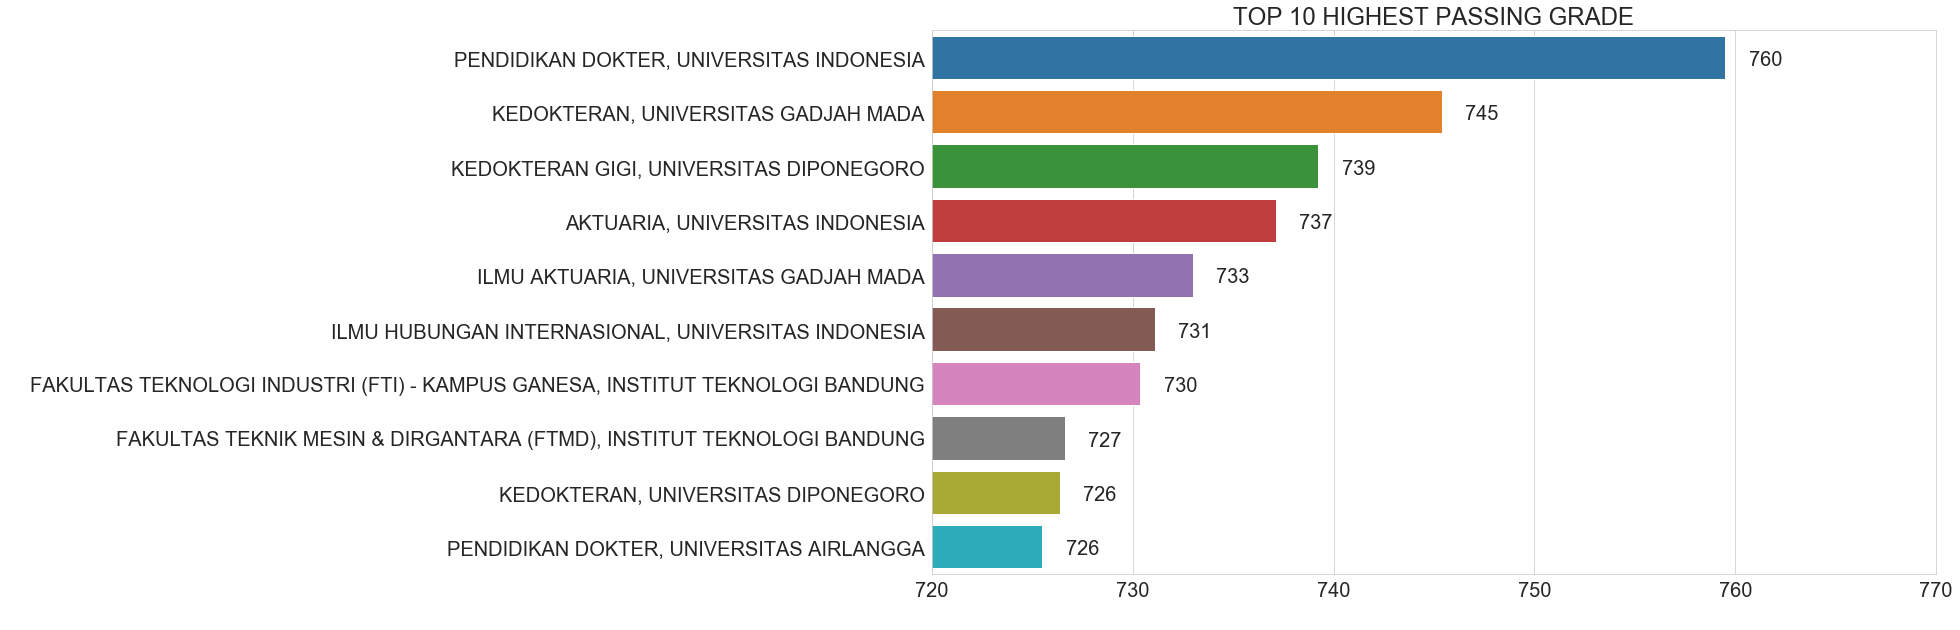

In [25]:
plt.figure(figsize=(18,10))
sns.set_style("whitegrid")
graph = sns.barplot(data=highest_pass_grade, x='passing_grade', y='major_univ')
plt.xlim(720,770)
plt.ylabel('MAJOR', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('TOP 10 HIGHEST PASSING GRADE')
plt.rcParams['font.size']=20

for p in graph.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')
        
plt.show()

####  Highest Acceptance Ratio

In [26]:
highest_acc_ratio = pass_grade1.nlargest(10, 'acceptance_ratio').loc[:,'major_name':]

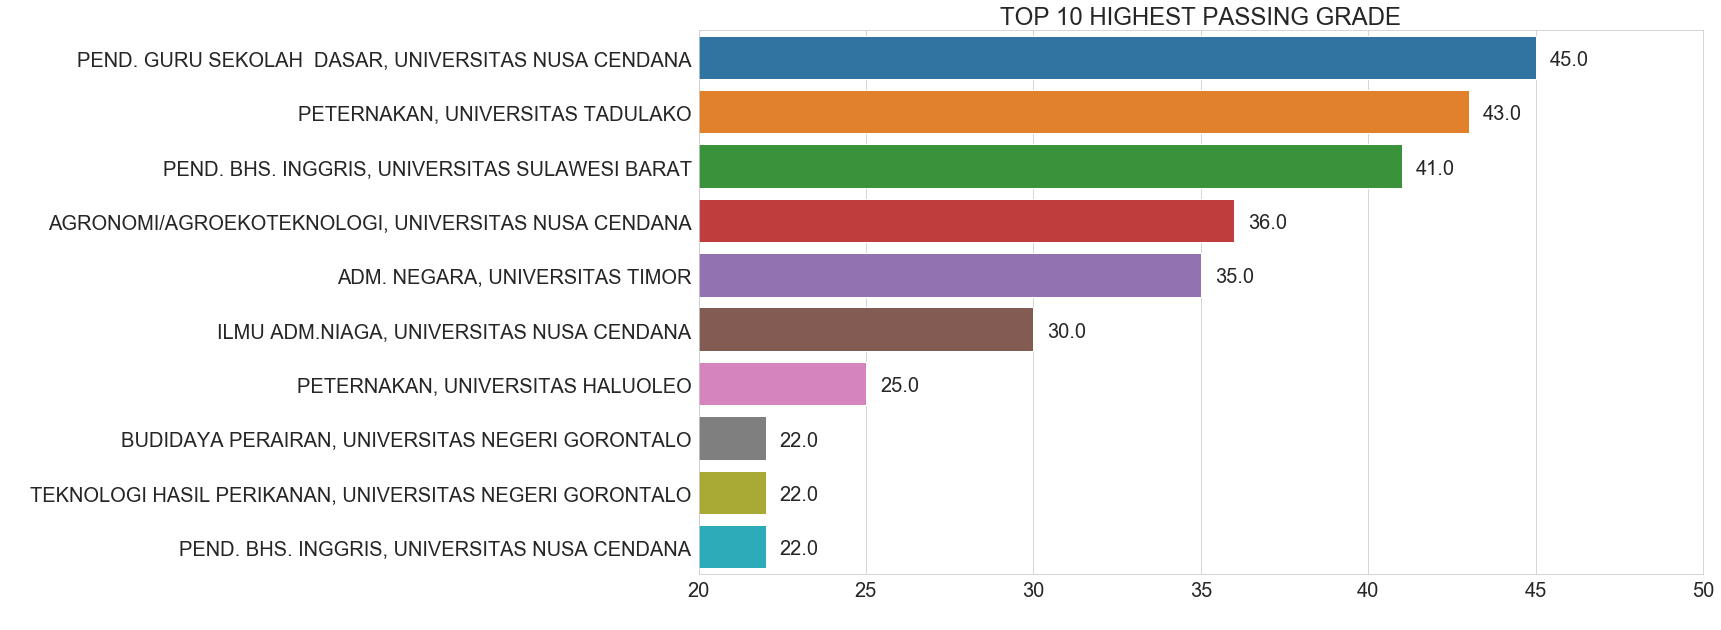

In [27]:
plt.figure(figsize=(18,10))
sns.set_style("whitegrid")
graph = sns.barplot(data=highest_acc_ratio, x='acceptance_ratio', y='major_univ')
plt.xlim(20,50)
plt.ylabel('MAJOR', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('TOP 10 HIGHEST PASSING GRADE')
plt.rcParams['font.size']=20

for p in graph.patches:
    width = p.get_width()
    plt.text(1+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.1f}'.format(width),
             ha='center', va='center')
        
plt.show()

####  Lowest Passing Grade

In [28]:
lowest_pass_grade = pass_grade1.nsmallest(10, 'passing_grade').sort_values(by='passing_grade', ascending=False)

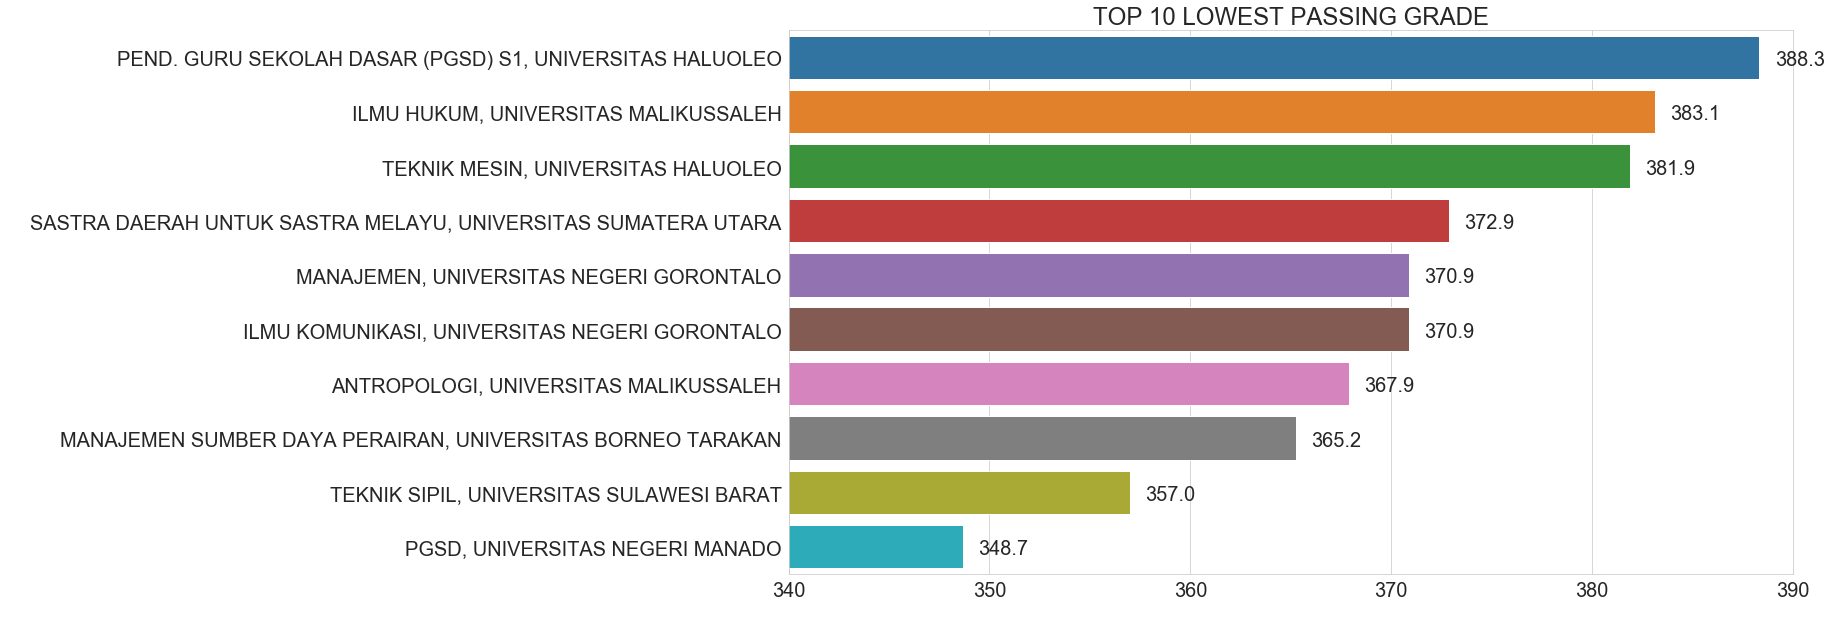

In [29]:
plt.figure(figsize=(18,10))
sns.set_style("whitegrid")
graph = sns.barplot(data=lowest_pass_grade, x='passing_grade', y='major_univ')
plt.xlim(340, 390)
plt.ylabel('MAJOR', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('TOP 10 LOWEST PASSING GRADE')
plt.rcParams['font.size']=20

for p in graph.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.1f}'.format(width),
             ha='center', va='center')
        
plt.show()

####  Lowest Acceptance Ratio

In [30]:
pass_grade1.dropna(inplace=True)
lowest_acc_ratio = pass_grade1.nsmallest(10, 'acceptance_ratio').sort_values(by='acceptance_ratio', ascending=False)

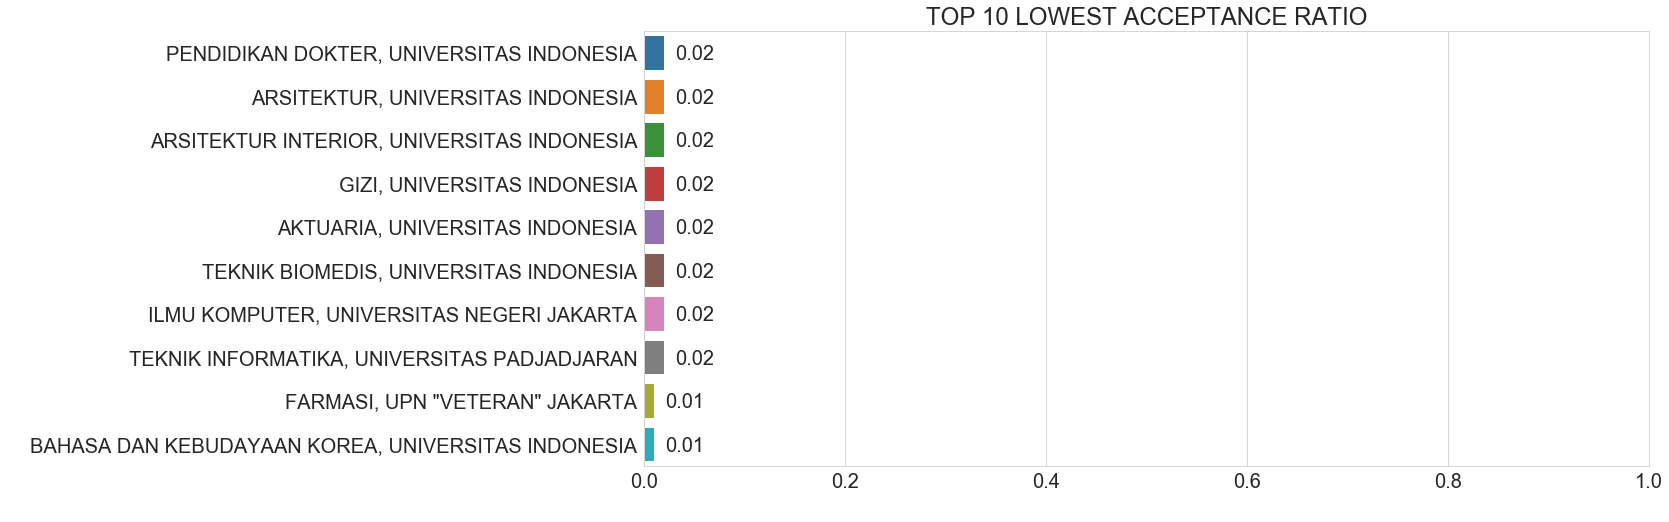

In [31]:
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
graph = sns.barplot(data=lowest_acc_ratio, x='acceptance_ratio', y='major_univ')
plt.xlim(0, 1)
plt.ylabel('MAJOR', color='w')
plt.xlabel('COUNTS', color='w')
plt.title('TOP 10 LOWEST ACCEPTANCE RATIO')
plt.rcParams['font.size']=20

for p in graph.patches:
    width = p.get_width()
    plt.text(0.03+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')
        
plt.show()